In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
plt.rcParams['figure.figsize'] = (12,6)

import warnings
warnings.filterwarnings('ignore')

---
# Get and manipulate the data


In [33]:
d = pd.read_csv('./_data/customers_time_resampled.csv',  delimiter =',', index_col='timestamp',parse_dates=True)
d = d.iloc[:,1:]
d

,customer_no,location,day,hour,location_after
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,Monday,7,dairy
2019-09-02 07:04:00,1,dairy,Monday,7,checkout
2019-09-02 07:05:00,1,checkout,Monday,7,checkout
2019-09-02 07:03:00,2,dairy,Monday,7,dairy
2019-09-02 07:04:00,2,dairy,Monday,7,dairy
...,...,...,...,...,...
2019-09-06 21:48:00,7443,dairy,Friday,21,dairy
2019-09-06 21:49:00,7443,dairy,Friday,21,checkout
2019-09-06 21:50:00,7443,checkout,Friday,21,checkout


In [39]:
df = d.copy()
df.rename(columns={'customer_no': 'cx_id', 'location_after':'next_loc'}, inplace=True)
df = df.reset_index()

In [53]:
df['next_loc'] = df['location'].shift(-1)
df['prev_loc'] = df['location'].shift(+1)

In [54]:
df['prev_loc'][0] = 'entrance'  
df['next_loc'][len(df)-1] = 'checkout'

for i in range(len(df)):

    if df['location'][i] == 'checkout':
        df['next_loc'][i] = 'LEFT'
    elif i < len(df)-1 and df['cx_id'][i] != df['cx_id'][i+1] and df['location'][i] != 'checkout':
        df['next_loc'][i] = 'checkout'

for i in range(1,len(df)):
    j=i-1
    if df['cx_id'][i] != df['cx_id'][i-1] :
        df['prev_loc'][i] = 'entrance'

<ipython-input-54-1775e2e437a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_loc'][0] = 'entrance'
<ipython-input-54-1775e2e437a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_loc'][len(df)-1] = 'checkout'
<ipython-input-54-1775e2e437a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_loc'][i] = 'LEFT'
<ipython-input-54-1775e2e437a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

### Probability Matrices

1. Transition Matrix 

In [80]:
probs = dff.groupby('location')['next_loc'].value_counts(normalize=True).unstack().fillna(0).iloc[:,1:]
probs

next_loc,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103466,0.736750,0.058569,0.049848,0.051367
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
fruit,0.201605,0.095924,0.054847,0.596947,0.050677
spices,0.150685,0.193214,0.163109,0.090953,0.402039


2. Spawn Probs
    - could still be improved by using only **first** locations, not all 

In [131]:
spawn_old = dff[dff['location']!='checkout']['location'].value_counts(normalize=True)#.unstack()#.fillna(0).iloc[:,1:]
spawn_old

dairy     0.382352
fruit     0.273373
drinks    0.209224
spices    0.135051
Name: location, dtype: float64

---

In [226]:
orig = pd.read_csv('./_data/whole_week_w_next_prev.csv', delimiter =',', index_col='timestamp',parse_dates=True).iloc[:,1:]


In [227]:
spawn = orig[orig['prev_loc']=='entrance']['location'].value_counts(normalize=True)#.unstack()#.fillna(0).iloc[:,1:]
spawn

fruit     0.377435
dairy     0.287576
spices    0.181464
drinks    0.153526
Name: location, dtype: float64

In [232]:
orig['hour'] = orig.index.hour

In [251]:
time_probs = orig.groupby('hour')['location'].value_counts(normalize=True).unstack()
#time_probs['row_sum'] = time_probs['checkout']+time_probs['dairy']+time_probs['drinks']+time_probs['fruit']+time_probs['spices']
time_probs

location,checkout,dairy,drinks,fruit,spices,row_sum
hour,,,,,,
7,0.294041,0.178109,0.180052,0.193653,0.154145,1.0
8,0.295633,0.198690,0.151965,0.204367,0.149345,1.0
9,0.299342,0.191447,0.151974,0.221053,0.136184,1.0
10,0.298393,0.205451,0.138365,0.188679,0.169113,1.0
11,0.307831,0.189019,0.135014,0.219622,0.148515,1.0
12,0.306709,0.179712,0.150160,0.197284,0.166134,1.0
13,0.293044,0.193843,0.135690,0.221779,0.155644,1.0
14,0.300606,0.193333,0.138788,0.209091,0.158182,1.0
15,0.308614,0.174532,0.142322,0.236704,0.137828,1.0


<AxesSubplot:xlabel='hour'>

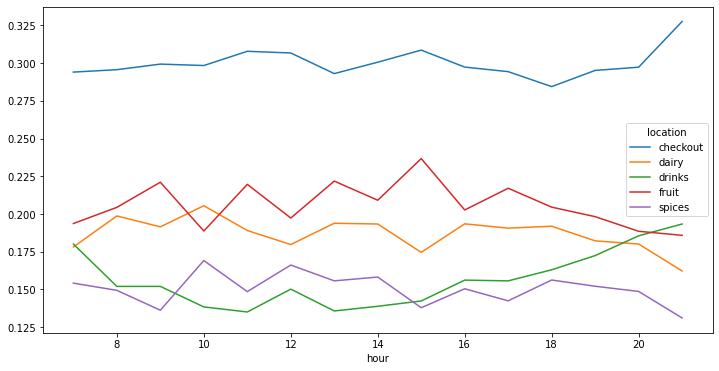

In [244]:
orig.groupby('hour')['location'].value_counts(normalize=True).unstack().plot()

In [229]:
orig[orig['prev_loc']=='entrance']['location'].plot()#.value_counts(normalize=True)

TypeError: no numeric data to plot

---
# Classes
---

In [ ]:
class Supermarket:
    
    def __init__(self, name):
        
        self.name = name
        self.customers = []
        self.locations = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
        self.time = 0
        
        
    def checkout_customer(self):
        
    
    def progress_time(self):
        if self.time < 840:
            self.time += 1
        
    def checkin_customer(self):

**Which "objects" do we have in our supermarket project?**

- Customer
    - attributes: `.location`, `.arrival_time`, `.departure_time`, `.total_time`, `.current_basket`
    - methods: `.change_location()`, `.checkout()`
    
    

In [205]:
class Customer:
    
    def __init__(self, name):
        
        self.name = name
        self.location = np.random.choice(['dairy','fruit','drinks','spices'], p=spawn)
        self.probs = probs
        self.possible_locations = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']

    def __repr__(self):
        return self.name
#        return f"Customer {self.name} is in the {self.location} section."
        
    def change_location(self):
        self.location = np.random.choice(self.possible_locations, p=self.probs.loc[self.location])
        


In [236]:
customers = [Customer(f'{i}') for i in range(10)]
cs = []
for c in customers:
#    print(c)
    customer_journey = [c.location]

    while c.location != 'checkout':
        c.change_location()
        customer_journey.append(c.location)
#        print(c)
    cs.append(customer_journey)
cs

[['dairy',
  'fruit',
  'fruit',
  'drinks',
  'drinks',
  'drinks',
  'drinks',
  'drinks',
  'checkout'],
 ['dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'fruit',
  'checkout'],
 ['drinks', 'checkout'],
 ['dairy', 'dairy', 'checkout'],
 ['dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'fruit',
  'fruit',
  'checkout'],
 ['spices', 'spices', 'checkout'],
 ['dairy', 'dairy', 'dairy', 'dairy', 'dairy', 'dairy', 'dairy', 'checkout'],
 ['fruit',
  'fruit',
  'fruit',
  'fruit',
  'fruit',
  'fruit',
  'spices',
  'fruit',
  'drinks',
  'spices',
  'drinks',
  'drinks',
  'drinks',
  'drinks',
  'spices',
  'fruit',
  'fruit',
  'fruit',
  'fruit',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'drinks',
  'checkout'],
 ['spices',
  'fruit',
  'fruit',
  'spices',
  'fruit',
  'fruit',
  'fruit',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'dairy',
  'da